In [1]:
%matplotlib ipympl
import numpy as np
import Bounding_Method as bndm
import matplotlib.pyplot as plt
import pyobs

plt.rcParams.update({
    "axes.axisbelow"   : True,
})

In [45]:
Ncnfg = int(1e6) # number of configs
mu    = 0.5 # central values
cov   = (mu*0.5)**2 # error^2

# autocorrelation time
tau = 4.5

rng = pyobs.random.generator('test bounding')
data = rng.markov_chain(mu, cov, tau, Ncnfg)

Random generator initialized with seed = 4170596706 [test bounding]


In [46]:
fake = pyobs.observable(description='Fake scalar observable')
fake.create('Ensemble A', data)
tau0  = fake.tauint()['Ensemble A'][0][0]
dtau0 = fake.tauint()['Ensemble A'][1][0]
print(f" Fake tau_int = {tau0:.2f} +- {dtau0:.2f}")

 Fake tau_int = 4.56 +- 0.06


In [47]:
norm, fake_gamma = fake.delta['Ensemble A:0'].gamma(Ncnfg, 0)
fake_gamma /= norm
fake_gamma = np.array(fake_gamma)

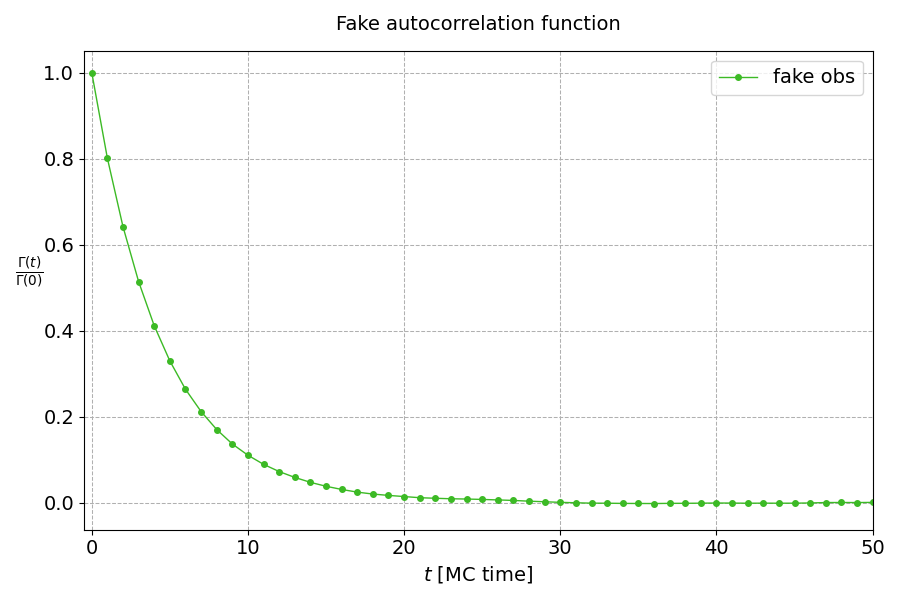

In [48]:
fig, ax = plt.subplots(figsize=(9, 6))

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.05)
plt.subplots_adjust(left   = 0.05)
plt.subplots_adjust(right  = 0.95)
fsize = 14

tmax = Ncnfg // 2 

plt.title(rf'Fake autocorrelation function', pad=15, fontsize=fsize)

ax.plot(np.arange(tmax), fake_gamma[:tmax]/fake_gamma[0], color='#3cba25', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=4.0,   label=rf'fake obs')
ax.set_xlabel(r'$t$ [MC time]', fontsize=fsize)
ax.set_ylabel(r'$\frac{\Gamma(t)}{\Gamma(0)}$', rotation=0, labelpad=10, fontsize=fsize)
ax.legend(loc='best', fontsize=fsize)


plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.xlim([-0.5, 50])
#plt.ylim([1e-2, 1e1])
#ax.set_yscale('log', base=10)
#ax.set_xscale('log', base=10)
ax.grid(linestyle = '--', linewidth = 0.75)

fig.tight_layout()

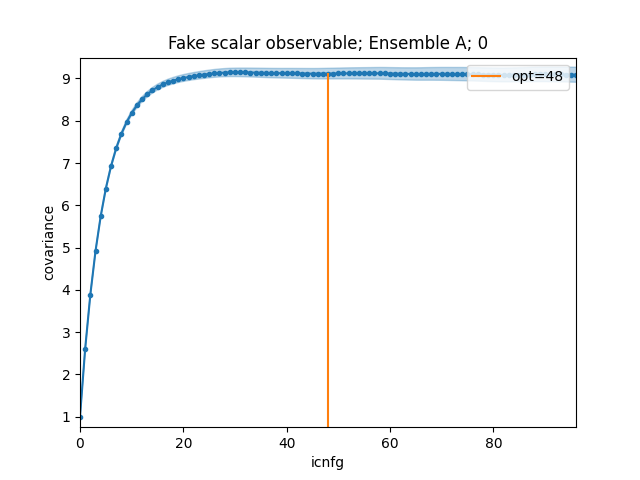

[array([0.45906976]), array([0.25172703])]

In [49]:
fake.error(plot=True)

In [51]:
W_bnd = bndm.bounding(fake_gamma, 2*tau0, Ncnfg)
    
print(f"\n W_bnd     = {W_bnd}")
W = W_bnd
print(f" err(W={W}) = {np.sqrt(bndm.Cbar_W(fake_gamma, W)/Ncnfg)}")


 slowest mode = 9.11558898827806

 W = 0,  tau_eff^W = 4.504629417736032,  LHS - RHS = -18.383895459119355,  err = 0.08337531511578361
 W = 1,  tau_eff^W = 4.512488116163055,  LHS - RHS = -5.647289477023335,  err = 0.13448623348911978
 W = 2,  tau_eff^W = 4.511983288120661,  LHS - RHS = -3.0285206849520305,  err = 0.16434210123990575
 W = 3,  tau_eff^W = 4.488015609352799,  LHS - RHS = -1.926839345081718,  err = 0.1848148970810167
 W = 4,  tau_eff^W = 4.515961549239159,  LHS - RHS = -1.311269309764736,  err = 0.19969225753754263
 W = 5,  tau_eff^W = 4.492050440838847,  LHS - RHS = -0.9457548298145004,  err = 0.21085819027407174
 W = 6,  tau_eff^W = 4.56959222437541,  LHS - RHS = -0.6862306324787207,  err = 0.2193865457482193
 W = 7,  tau_eff^W = 4.55354175253575,  LHS - RHS = -0.5198819849675598,  err = 0.22600563407610025
 W = 8,  tau_eff^W = 4.549229616907629,  LHS - RHS = -0.39781067561779243,  err = 0.23118254479585704
 W = 9,  tau_eff^W = 4.713459879511167,  LHS - RHS = -0.295665

In [18]:
for i in range(20):
    print(i, 1/np.log(fake_gamma[i]/fake_gamma[i+1]))

0 4.64692324720613
1 4.480756522808628
2 4.422517244389654
3 4.565578980822043
4 4.246996403451005
5 4.217611654838883
6 3.7779108593382293
7 3.733492951570801
8 3.242774118800667
9 2.942359166706412
10 3.156932342358137
11 3.631394271897649
12 1.9914821193360437
13 1.950789263652373
14 1.1868924753723262
15 nan
16 -0.4261477853584817
17 -7.986838307270474
18 90.75613725151113
19 -5.534719966343956


/knuthome/gmorandi/gabriele_py/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
